In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import requests

# from acquire import get_store_data

In [2]:

def get_df(name):
    """
    This function takes in the string
    'items', 'stores', or 'sales' and
    returns a df containing all pages and
    creates a .csv file for future use.
    """
    base_url = 'https://python.zach.lol'
    api_url = base_url + '/api/v1/'
    response = requests.get(api_url + name)
    data = response.json()
    
    # create list from 1st page
    my_list = data['payload'][name]
    
    # loop through the pages and add to list
    while data['payload']['next_page'] != None:
        response = requests.get(base_url + data['payload']['next_page'])
        data = response.json()
        my_list.extend(data['payload'][name])
    
    # Create DataFrame from list
    df = pd.DataFrame(my_list)
    
    # Write DataFrame to csv file for future use
    df.to_csv(name + '.csv')
    return df

######################### Params Helper function, can be used in big_df ###############################

def get_df_params(name):
    """
    This function takes in the string
    'items', 'stores', or 'sales' and
    returns a df containing all pages and
    creates a .csv file for future use.
    """
    # Create an empty list names `results`.
    results = []
    
    # Create api_url variable
    api_url = 'https://python.zach.lol/api/v1/'
    
    # Loop through the page parameters until an empty response is returned.
    for i in range(3):
        response =  requests.get(items_url, params = {"page": i+1})    
    
        # We have reached the end of the results
        if len(response.json()) == 0:   
            break
            
        else:
            # Convert my response to a dictionary and store as variable `data`
            data = response.json()
        
            # Add the list of dictionaries to my list
            results.extend(data['payload'][name])
    
    # Create DataFrame from list
    df = pd.DataFrame(results)
    
    # Write DataFrame to csv file for future use
    df.to_csv(name + '.csv')
    
    return df


def get_store_data():
    """
    This function checks for csv files
    for items, sales, stores, and big_df 
    if there are none, it creates them.
    It returns one big_df of merged dfs.
    """
    # check for csv files or create them
    if os.path.isfile('items.csv'):
        items_df = pd.read_csv('items.csv', index_col=0)
    else:
        items_df = get_df('items')
        
    if os.path.isfile('stores.csv'):
        stores_df = pd.read_csv('stores.csv', index_col=0)
    else:
        stores_df = get_df('stores')
        
    if os.path.isfile('sales.csv'):
        sales_df = pd.read_csv('sales.csv', index_col=0)
    else:
        sales_df = get_df('sales')
        
    if os.path.isfile('big_df.csv'):
        df = pd.read_csv('big_df.csv', index_col=0)
        return df
    else:
        # merge all of the DataFrames into one
        df = pd.merge(sales_df, stores_df, left_on='store', right_on='store_id').drop(columns={'store'})
        df = pd.merge(df, items_df, left_on='item', right_on='item_id').drop(columns={'item'})

        # write merged DateTime df with all data to directory for future use
        df.to_csv('big_df.csv')
        return df

In [3]:
df = get_store_data()

In [4]:
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


Convert date column to datetime format.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_date      913000 non-null  object 
 2   sale_id        913000 non-null  int64  
 3   store_address  913000 non-null  object 
 4   store_city     913000 non-null  object 
 5   store_id       913000 non-null  int64  
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_id        913000 non-null  int64  
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [6]:
df.sale_date.head()

0    Tue, 01 Jan 2013 00:00:00 GMT
1    Wed, 02 Jan 2013 00:00:00 GMT
2    Thu, 03 Jan 2013 00:00:00 GMT
3    Fri, 04 Jan 2013 00:00:00 GMT
4    Sat, 05 Jan 2013 00:00:00 GMT
Name: sale_date, dtype: object

In [7]:
sale_df = df.copy()

In [8]:
sale_df.sale_date = pd.to_datetime(sale_df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')


In [15]:
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')


Plot the distribution of sale_amount and item_price.


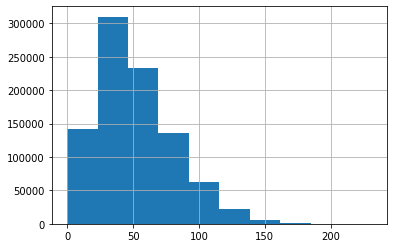

In [9]:
sale_df.sale_amount.hist()

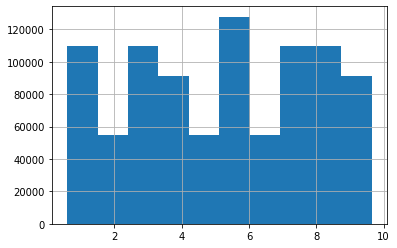

In [10]:
sale_df.item_price.hist()

Set the index to be the datetime variable.


In [11]:
sale_df = sale_df.set_index('sale_date').sort_index()


In [12]:
sale_df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


Add a 'month' and 'day of week' column to your dataframe.


In [26]:
sale_df['month'] = sale_df.index.month

In [27]:
sale_df['day_of_week'] = sale_df.index.dayofweek

In [28]:
sale_df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1


In [29]:
sale_df.month.value_counts()

12    77500
10    77500
8     77500
7     77500
5     77500
3     77500
1     77500
11    75000
9     75000
6     75000
4     75000
2     70500
Name: month, dtype: int64

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [30]:
sale_df['sales_total'] = sale_df.sale_amount * sale_df.item_price

In [31]:
sale_df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,1,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,294.00


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [32]:
def prep(df):
    df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')
    df = df.set_index('sale_date').sort_index()
    df['month'] = df.index.month
    df['day_of_week'] = df.index.dayofweek
    df['sales_total'] = df.sale_amount * df.item_price

In [33]:
germany = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [34]:
germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [35]:
germany.Wind.value_counts()

229.770    2
34.973     2
29.274     2
21.540     2
31.469     2
          ..
186.179    1
280.778    1
162.956    1
157.262    1
32.000     1
Name: Wind, Length: 2914, dtype: int64

Convert date column to datetime format.


In [36]:
germany.Date = pd.to_datetime(germany.Date)



Plot the distribution of each of your variables.


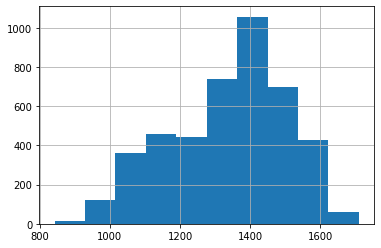

In [37]:
germany.Consumption.hist()

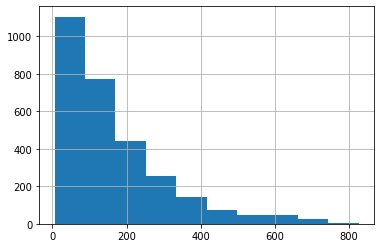

In [38]:
germany.Wind.hist()

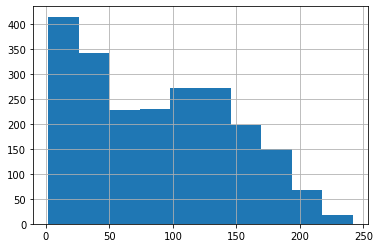

In [39]:
germany.Solar.hist()

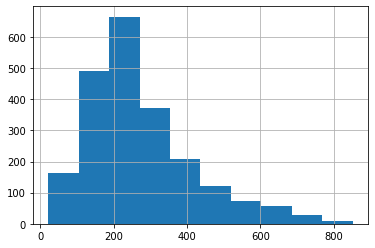

In [40]:
germany['Wind+Solar'].hist()

Set the index to be the datetime variable.


In [41]:
germany = germany.set_index('Date').sort_index()


Add a month and a year column to your dataframe.


In [42]:
germany['month'] = germany.index.month


In [43]:
germany['year'] = germany.index.year

Fill any missing values.


In [44]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [47]:
germany.Wind.fillna(0, inplace=True)

In [48]:
germany.Solar.fillna(0, inplace=True)

In [49]:
germany['Wind+Solar'].fillna(0, inplace=True)

In [ ]:
def germany_prep():
    df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
    df.Date = pd.to_datetime(df.Date)
    df = df.set_index('Date').sort_index()
    df['month'] = df.index.month
    df['year'] = df.index.year
    df.Wind.fillna(0, inplace=True)
    df.Solar.fillna(0, inplace=True)
    df['Wind+Solar'].fillna(0, inplace=True)
    return df